In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [39]:
# Создаём сэмпл
n_samples = 1000

#Пробуем создать датасет с данными по фонду оплаты труда сотрудников проитзводства, но без учета налогов

hazardous_production = np.random.randint(0,2, n_samples) #Факт участия на вредном произвостве и, соответстенно, оплата
experience = np.random.randint(1, 6, n_samples)          #опыт сотрудника, как дополнительный бонус к ставке
rate = np.random.randint(1, 4, n_samples) * 1000         #ставка сотрудника за каждый проект, в котором он участвует
project_qty = np.random.randint(1, 10, n_samples)        #количество проектов, на которых работает сотрудник

#Фонд оплаты сотрудника складывается как умноженная на количество проектов плюс бонус за опыт - бонус * на 300
# и плюс бонус за вредное производство - плюс еще одна ставка в случае вредного производства.
Cost = rate * project_qty + experience * 300  + hazardous_production * rate


data = pd.DataFrame({'rate': rate,
                     'project_qty': project_qty,
                     'experience': experience, 
                     'hazardous_production': hazardous_production, 
                     'Cost': Cost})
data.head(10)

,rate,project_qty,experience,hazardous_production,Cost
0,3000,9,4,1,31200
1,3000,8,4,1,28200
2,2000,4,4,1,11200
3,3000,8,4,1,28200
4,1000,6,3,0,6900
5,1000,8,2,1,9600
6,3000,6,2,0,18600
7,3000,2,2,1,9600
8,1000,6,2,0,6600
9,3000,5,1,1,18300


попробуем предсказать фонд оплаты по данным ставки, количества проектов, опыта и наличия вредного производства

In [48]:
X = data[['rate', 'project_qty', 'experience', 'hazardous_production']]
y = data['Cost']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['rate', 'project_qty', 'experience', 'hazardous_production']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('y.mean: ', y.mean())

Weights: [   5.51727364 2050.83205756  276.59356131 2124.55071605]
Bias: -11351.664117758215
Error: 1541.9658866293717
y.mean:  12087.4


Коэффициенты "зашкаливают", среднее значение целевой переменной по модулю очень близко к bias
Надо проверить зависимости коэффициентов

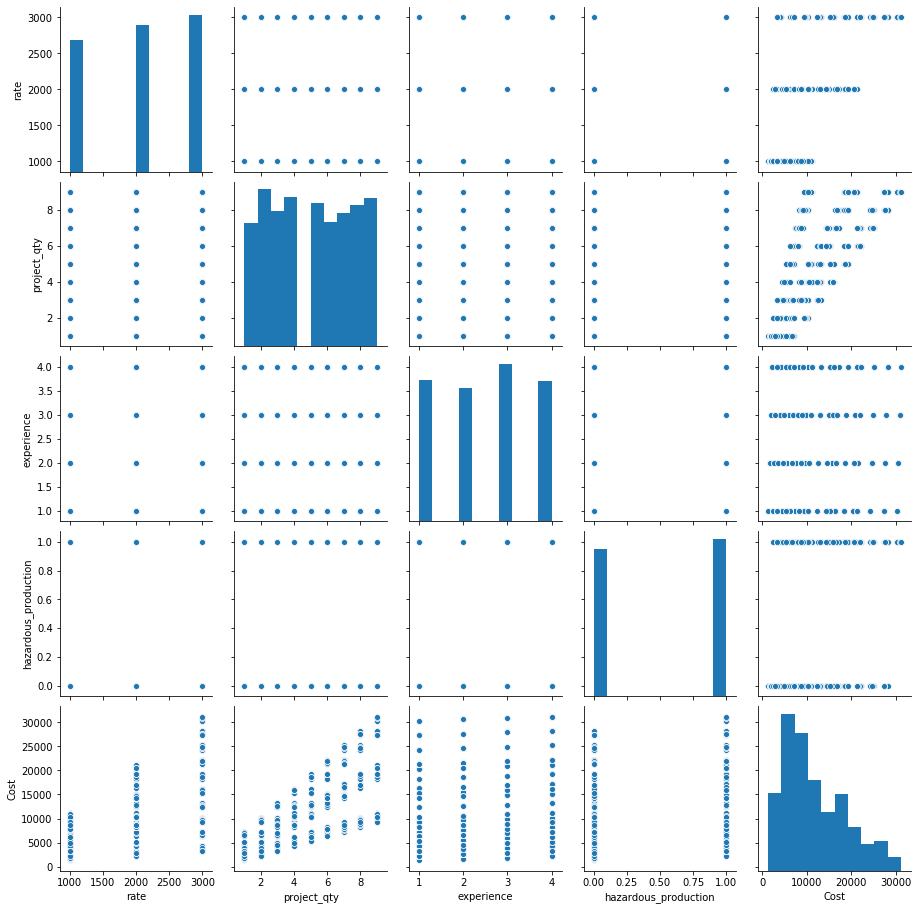

In [40]:
sns.pairplot(data)

Из графиков можно следать вывод, что целевая переменная линейно зависит от количества проектов и от ставки.
Попробуем сделать новый признак

In [43]:
# Создаем новый признак
data['Cost_1'] = data['rate'] * data['project_qty']
data.head(5)

,rate,project_qty,experience,hazardous_production,Cost,Cost_1
0,3000,9,4,1,31200,27000
1,3000,8,4,1,28200,24000
2,2000,4,4,1,11200,8000
3,3000,8,4,1,28200,24000
4,1000,6,3,0,6900,6000


Попробуем предсказать фонд на основе нового признака, а также опыта и наличия вредного производства

In [45]:
X_new = data[['Cost_1', 'experience', 'hazardous_production']]
#y = data['Cost']
reg1 = LinearRegression().fit(X_new, y)
print('Weights: {}'.format(reg1.coef_))
print('Bias: {}'.format(reg1.intercept_))

pred_values = reg1.predict(data[['Cost_1', 'experience', 'hazardous_production']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [1.03510413e+00 3.12176296e+02 2.02565357e+03]
Bias: -397.14429295280206
Error: 398.8030769058002


Коэффициенты практически совпадают с нашей исходной моделью